### MobileNetV2

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [ ]:
# Normalize images to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten labels for sparse_categorical_crossentropy
y_train = y_train.flatten()
y_test = y_test.flatten()

In [ ]:
# Build MobileNetV2 model

base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(32, 32, 3)
)

base_model.trainable = False  # freeze base model

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/tmp/ipython-input-1770299623.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# ------------------------------
#  Compile model
# ------------------------------
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ------------------------------
#  Train model
# ------------------------------
history = model.fit(
    X_train, y_train,
    batch_size=64,
    epochs=5,
    validation_split=0.2
)

# ------------------------------
#  Evaluate on test set
# ------------------------------
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy:.4f}")

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.3770 - loss: 1.7171 - val_accuracy: 0.3557 - val_loss: 1.7933
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3832 - loss: 1.7003 - val_accuracy: 0.3556 - val_loss: 1.7939
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3896 - loss: 1.6751 - val_accuracy: 0.3624 - val_loss: 1.7820
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3983 - loss: 1.6635 - val_accuracy: 0.3609 - val_loss: 1.7881
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4028 - loss: 1.6482 - val_accuracy: 0.3631 - val_loss: 1.7812
313/313 - 4s - 12ms/step - accuracy: 0.3571 - loss: 1.7965
Test accuracy: 0.3571


In [ ]:
# ------------------------------
# Predictions
# ------------------------------
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=class_names)
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step
              precision    recall  f1-score   support

    airplane       0.37      0.43      0.40      1000
  automobile       0.37      0.34      0.36      1000
        bird       0.30      0.21      0.25      1000
         cat       0.33      0.21      0.26      1000
        deer       0.39      0.40      0.39      1000
         dog       0.31      0.28      0.29      1000
        frog       0.41      0.49      0.45      1000
       horse       0.40      0.32      0.35      1000
        ship       0.35      0.41      0.38      1000
       truck       0.33      0.47      0.39      1000

    accuracy                           0.36     10000
   macro avg       0.35      0.36      0.35     10000
weighted avg       0.35      0.36      0.35     10000



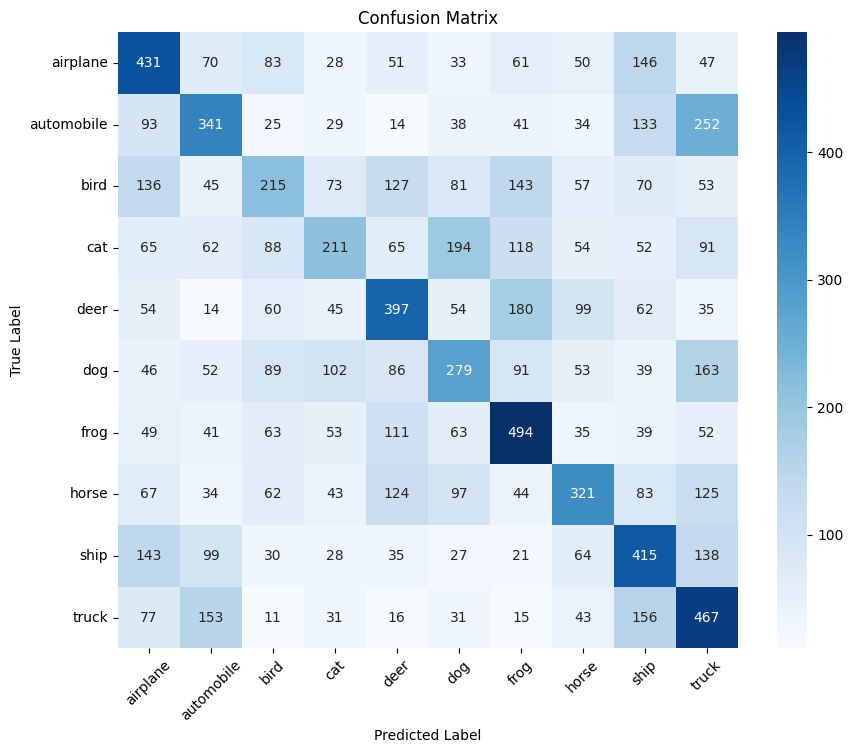

In [ ]:
# ------------------------------
# Confusion_matrix
# ------------------------------
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.optimizers import Adam

# -------------------------------
# Load CIFAR-10
# -------------------------------
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

IMG_SIZE = 96
BATCH_SIZE = 64

# -------------------------------
# tf.data pipeline (on-the-fly resize + preprocess)
# -------------------------------
def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = preprocess_input(image)       # MobileNet preprocessing
    return image, label

train_ds = (
    tf.data.Dataset.from_tensor_slices((x_train, y_train))
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    .shuffle(5000)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

test_ds = (
    tf.data.Dataset.from_tensor_slices((x_test, y_test))
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

# -------------------------------
# Build MobileNet model
# -------------------------------
base_model = MobileNet(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer=Adam(1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# -------------------------------
# Train head
# -------------------------------
history1 = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

# -------------------------------
# Fine-tune last 20 layers
# -------------------------------
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

model.compile(
    optimizer=Adam(1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history2 = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

# -------------------------------
# Evaluate
# -------------------------------
loss, acc = model.evaluate(test_ds)
print("Test accuracy:", acc)


/tmp/ipython-input-1453398189.py:45: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 29ms/step - accuracy: 0.7652 - loss: 0.7015 - val_accuracy: 0.8389 - val_loss: 0.4671
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8615 - loss: 0.3916 - val_accuracy: 0.8512 - val_loss: 0.4363
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8930 - loss: 0.3031 - val_accuracy: 0.8489 - val_loss: 0.4583
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9158 - loss: 0.2380 - val_accuracy: 0.8499 - val_loss: 0.4744
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9412 - loss: 0.1717 - val_accuracy: 0.8530 - val_loss: 0.5173
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9550 - loss: 0.1252 - val_accuracy: 0.8472 - val_loss: 0.5695
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9687 - loss: 0.0897 - val_accuracy: 0.8532 - val_loss: 0.6063
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━

In [3]:
import numpy as np
from sklearn.metrics import classification_report

# -------------------------------
# Get predictions
# -------------------------------
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# y_test as a flat array
y_true = y_test

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# -------------------------------
# Classification report
# -------------------------------
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step
              precision    recall  f1-score   support

    airplane       0.93      0.88      0.90      1000
  automobile       0.92      0.93      0.92      1000
        bird       0.92      0.81      0.86      1000
         cat       0.80      0.70      0.75      1000
        deer       0.73      0.92      0.81      1000
         dog       0.81      0.82      0.81      1000
        frog       0.93      0.88      0.90      1000
       horse       0.90      0.91      0.91      1000
        ship       0.94      0.93      0.94      1000
       truck       0.88      0.94      0.91      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



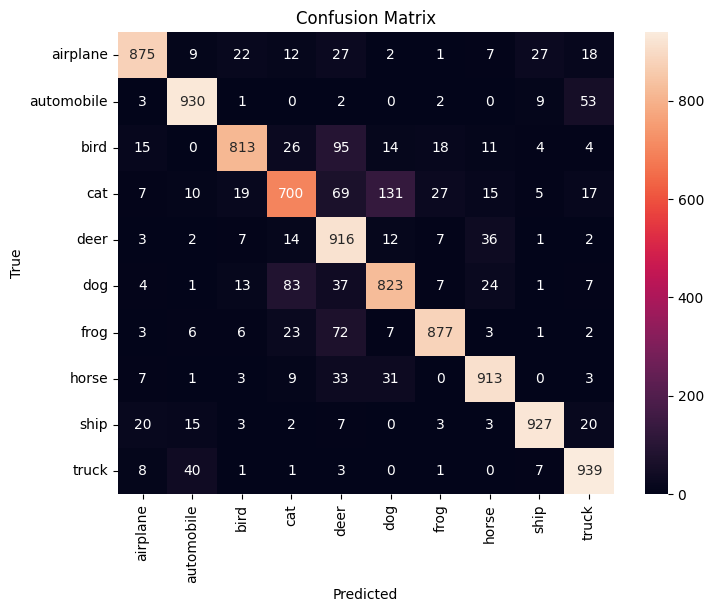

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

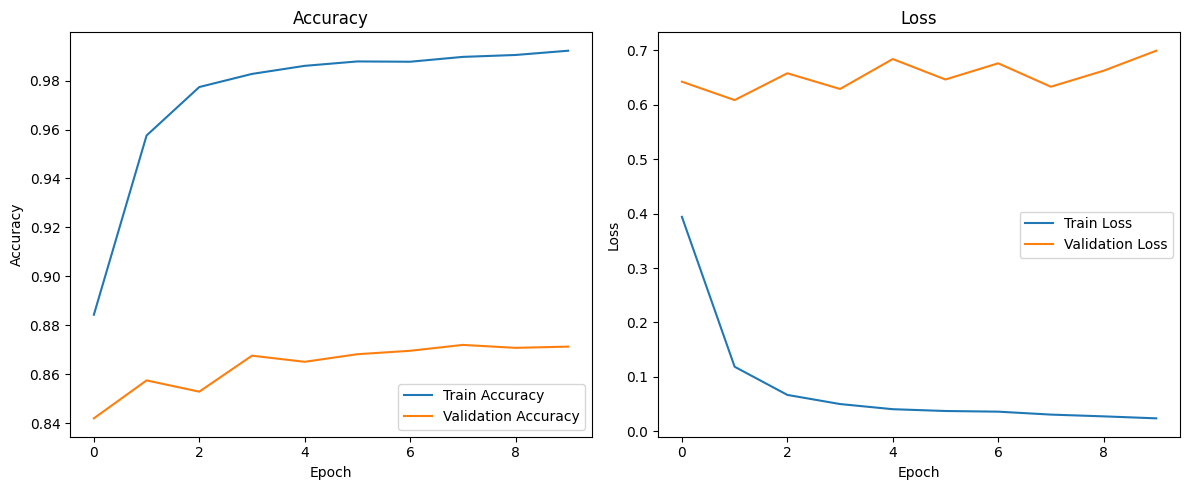

In [5]:
#-------------------------------
# Plot training history
# -------------------------------

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()